In [2]:
import numpy as np
import obspy
import glob
from scipy import signal
import matplotlib.pyplot as plt
import os
from obspy import UTCDateTime as UTC
import matplotlib
import matplotlib.patches as patches
from matplotlib.offsetbox import AnchoredText

In [8]:
newst=obspy.read('/home/yaolinm/Projects/Japan/coherence/coh_allch/for_plot.mseed')
channel_thre=np.load('/nfs/turbo/lsa-zspica/work/yaolinm/working_notebooks/Japan/channel_thre3.npy')

In [5]:
npys=glob.glob('/nfs/turbo/lsa-zspica/work/yaolinm/Japan_detection/coherence_test/all_channel/028hr/*.npy')
npys.sort()
df=np.load(npys[0])
for i in range(1,len(npys)):
    df0=np.load(npys[i])
    df=np.concatenate((df,df0))

In [6]:
from matplotlib.colors import LinearSegmentedColormap

def create_white_min_colormap():
    colors = [(1, 1, 1), (0, 0, 0)]  # White to blue
    cmap = LinearSegmentedColormap.from_list('white_min_cmap', colors)
    return cmap

cmap = create_white_min_colormap()

In [11]:
passed_chs=np.zeros(890)
for i in range(890):
    for j in range(9599):
        if df[j,i]>=channel_thre[j]:
            passed_chs[i]+=1

Text(0.95, 0.32, 'Minute after 2019-11-21 T 13:00:24 (JST)')

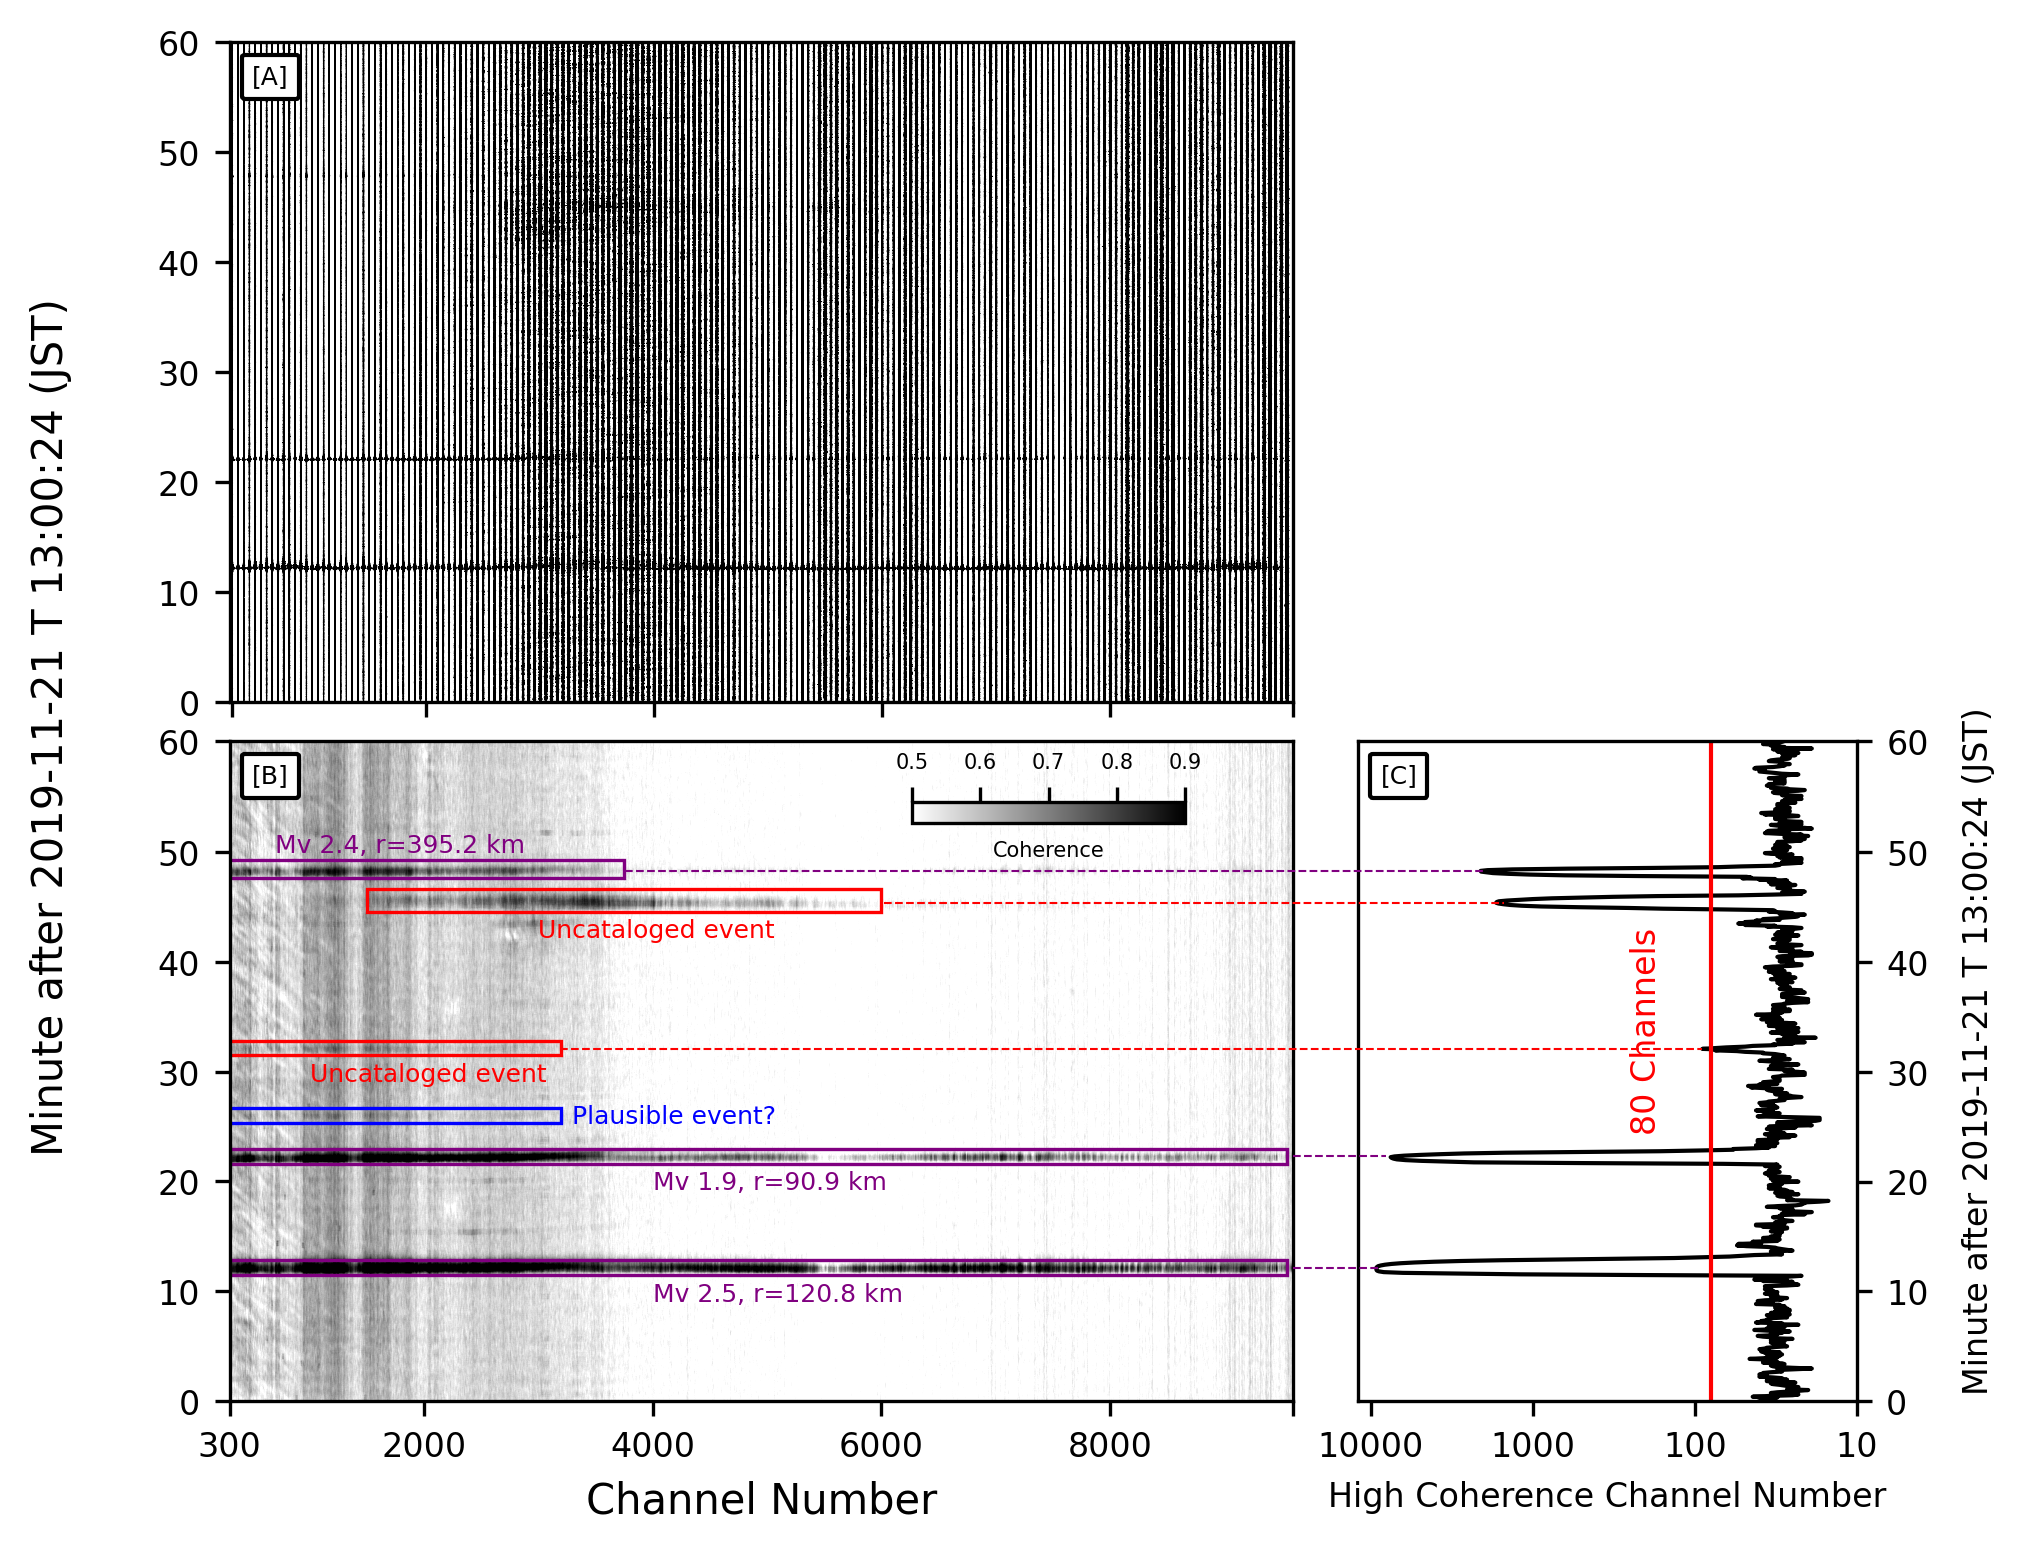

In [77]:
fig=plt.figure(figsize=(7,6),dpi=300)
fig.subplots_adjust(hspace=0.2,wspace=0.3)

ax1 = plt.subplot2grid(shape=(6,6), loc=(0,0), colspan=4,rowspan=3)
ax2 = plt.subplot2grid(shape=(6,6), loc=(3,0), colspan=4,rowspan=3)
ax3 = plt.subplot2grid(shape=(6,6), loc=(3,4), colspan=2,rowspan=3)

##ax1
for i in range(len(newst)):
    ax1.plot(newst[i].data/np.max(np.abs(newst[i].data))+i*2,np.arange(len(newst[i].data)),c='k',linewidth=0.2)
    
ax1.set_xticks([3*4,20*4,40*4,60*4,80*4,96*4])
ax1.set_xticklabels(['','','','','',''])
ax1.set_xlim(11,384)
ax1.set_ylim(0,25*3600)
ax1.set_yticks([0,600*25,1200*25,1800*25,2400*25,3000*25,3600*25])
ax1.set_yticklabels([0,10,20,30,40,50,60],fontsize=8)
at=AnchoredText('[A]',prop=dict(size=6), frameon=True,loc=2)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.1)
ax1.add_artist(at)

fig.text(0.03, 0.5, 'Minute after 2019-11-21 T 13:00:24 (JST)', va='center', rotation='vertical',fontsize=10)

##ax2
# sc=ax2.imshow(df.T,aspect='auto',vmin=0.5,vmax=0.9,cmap='YlGnBu')
sc=ax2.imshow(df.T,aspect='auto',vmin=0.5,vmax=0.9,cmap=cmap)
ax2.invert_yaxis()

ax2.set_xticks([300,2000,4000,6000,8000,9600])
ax2.set_xticklabels([300,2000,4000,6000,8000,''],fontsize=8)
ax2.set_xlim(300,9600)
ax2.set_xlabel('Channel Number',fontsize=10)
ax2.set_yticks([0,148,296,444,592,740,890])
ax2.set_yticklabels([0,10,20,30,40,50,60],fontsize=8)
at=AnchoredText('[B]',prop=dict(size=6), frameon=True,loc=2)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.1)
ax2.add_artist(at)

rect = patches.Rectangle((200,170), 9350, 20, linewidth=0.8, edgecolor='purple', facecolor='none')
ax2.add_patch(rect)
ax2.text(4000,135,'Mv 2.5, r=120.8 km',fontsize=6,c='purple')

rect = patches.Rectangle((200,320), 9350, 20, linewidth=0.8, edgecolor='purple', facecolor='none')
ax2.add_patch(rect)
ax2.text(4000,285,'Mv 1.9, r=90.9 km',fontsize=6,c='purple')

rect = patches.Rectangle((200,375), 3000, 20, linewidth=0.8, edgecolor='blue', facecolor='none')
ax2.add_patch(rect)
ax2.text(3300,375,'Plausible event?',fontsize=6,c='blue')

rect = patches.Rectangle((200,466), 3000, 20, linewidth=0.8, edgecolor='red', facecolor='none')
ax2.add_patch(rect)
ax2.text(1000,466-35,'Uncataloged event',fontsize=6,c='red')

rect = patches.Rectangle((1500,660), 4500, 30, linewidth=0.8, edgecolor='red', facecolor='none')
ax2.add_patch(rect)
ax2.text(3000,660-35,'Uncataloged event',fontsize=6,c='red')

rect = patches.Rectangle((200,705), 3550, 25, linewidth=0.8, edgecolor='purple', facecolor='none')
ax2.add_patch(rect)
ax2.text(700,740,'Mv 2.4, r=395.2 km',fontsize=6,c='purple')

cax=fig.add_axes([0.45,0.446,0.13,0.012])
cbar=fig.colorbar(sc, cax=cax, orientation='horizontal')
cbar.set_label('Coherence',fontsize=5)
sc.set_clim(0.5,0.9)
cbar.ax.tick_params(labelsize=5) 
cbar.ax.xaxis.set_ticks_position('top')


ax3.plot(passed_chs,np.arange(len(passed_chs)),c='k',lw=1)
ax3.set_xscale('log')
ax3.set_xlim(12000,10)
ax3.set_ylim(0,len(passed_chs))
ax3.vlines(80,0,890,color='r',lw=1)

ax3.set_yticks([0,148,296,444,592,740,890])
ax3.set_yticklabels([0,10,20,30,40,50,60],fontsize=8)
ax3.yaxis.tick_right()

ax3.set_xticks([10,100,1000,10000])
ax3.set_xticklabels([10,100,1000,10000],fontsize=8)
ax3.set_xlabel('High Coherence Channel Number',fontsize=8)
# ax3.xaxis.tick_top()

ax3.hlines(180,30000,9000,color='purple',ls='--',lw=0.5,clip_on=False,zorder=10)
ax3.hlines(330,30000,8000,color='purple',ls='--',lw=0.5,clip_on=False,zorder=10)
ax3.hlines(715,10**8*4,2000,color='purple',ls='--',lw=0.5,clip_on=False,zorder=10)

ax3.hlines(672,10**7,1500,color='r',ls='--',lw=0.5,clip_on=False,zorder=10)
ax3.hlines(475,10**9,90,color='r',ls='--',lw=0.5,clip_on=False,zorder=10)

at=AnchoredText('[C]',prop=dict(size=6), frameon=True,loc=2)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.1)
ax3.add_artist(at)
ax3.text(250,500, '80 Channels', va='center', rotation='vertical',color='r',fontsize=8,zorder=11)

fig.text(0.95, 0.32, 'Minute after 2019-11-21 T 13:00:24 (JST)', va='center', rotation='vertical',fontsize=8)
# plt.savefig('coh_example3.png',dpi=300, bbox_inches = 'tight')